**Understanding the problem:**

Acoustic Fire Extinguishing System consists 4 subwoofers and 2 amplifiers. It is basically to extinguish the flame using sound waves. Computer is used as frequency source, anemometer to measure the air flow, decibel meter to measure the sound intensity and infrared thermometer to measure the temperature of the flame, and camera to detect the extinction time of the flame.

Here. 4 different fuel flames were tested. The dataset contains the experimental records with 6 input features and a target variable. 

It's a binary classification wiith two classes: 
0 - flame extinction state;
1 - non-extinction state

**Understanding the data**

In [1]:
# importing libraries
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

In [2]:
#Loading dataset
flame = pd.read_excel('/kaggle/input/acoustic-extinguisher-fire-dataset/Acoustic_Extinguisher_Fire_Dataset/Acoustic_Extinguisher_Fire_Dataset.xlsx')
flame.head()

,SIZE,FUEL,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS
0,1,gasoline,10,96,0.0,75,0
1,1,gasoline,10,96,0.0,72,1
2,1,gasoline,10,96,2.6,70,1
3,1,gasoline,10,96,3.2,68,1
4,1,gasoline,10,109,4.5,67,1


In [3]:
flame.shape

(17442, 7)

In [4]:
flame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17442 entries, 0 to 17441
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SIZE       17442 non-null  int64  
 1   FUEL       17442 non-null  object 
 2   DISTANCE   17442 non-null  int64  
 3   DESIBEL    17442 non-null  int64  
 4   AIRFLOW    17442 non-null  float64
 5   FREQUENCY  17442 non-null  int64  
 6   STATUS     17442 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 954.0+ KB


There are no missing values.

Categorical : Fuel, Status

Numerical: Size, Distance, Desibel, Airflow, Frequency

Now, let's understand the shape of each variable.

In [5]:
flame['SIZE'].unique()     # discrete
flame['DISTANCE'].unique() # discrete
flame['DESIBEL'].unique()  # discrete
flame['AIRFLOW'].unique()  # continuous
flame['FREQUENCY'].unique() # discrete

array([75, 72, 70, 68, 67, 66, 65, 60, 55, 52, 51, 50, 48, 47, 46, 45, 44,
       42, 40, 38, 36, 35, 34, 33, 32, 30, 28, 27, 26, 25, 24, 23, 22, 21,
       20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10,  9,  8,  7,  6,  5,  4,
        3,  2,  1])

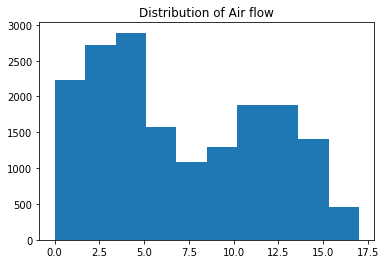

In [6]:
plt.hist(flame['AIRFLOW'])
plt.title('Distribution of Air flow')
plt.show()

In [7]:
#Excluding continuous variables
df = flame
del df['AIRFLOW']

We can use either barplot or countplot to understand the categorical variables.

**Countplot:** Countplot plots the count of the number of records by category. 

**Barplot:** Barplot plots a value or metric for each category. Metric can be given in 'estimator' parameter. By default, it counts the number of values in particular category.

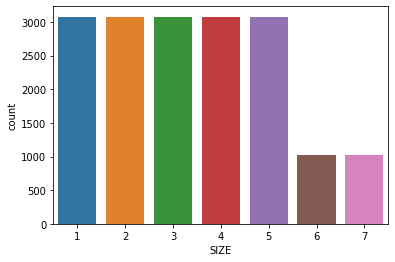

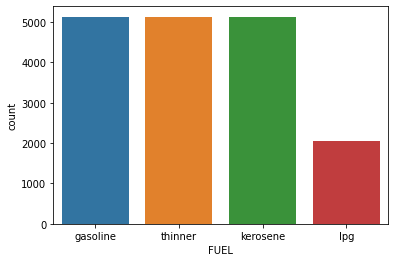

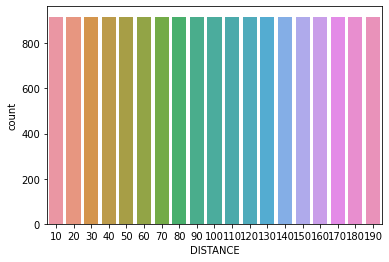

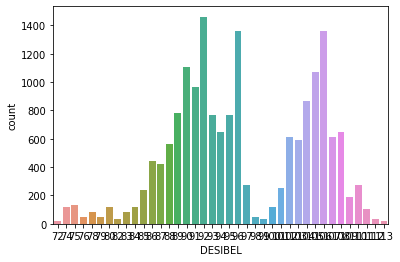

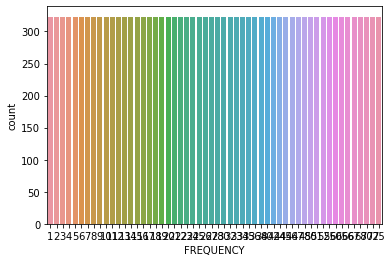

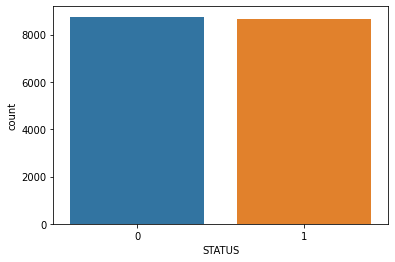

In [8]:
for i in df.columns:
   #sns.barplot(x=df[i].value_counts().index, y=df[i].value_counts()).set_title(i)
   sns.countplot(x=df[i])
   plt.show()

In [9]:
# Cross tabulation
pd.crosstab(flame['FUEL'], flame['STATUS'])

STATUS,0,1
FUEL,,
gasoline,2381,2749
kerosene,2831,2299
lpg,905,1147
thinner,2642,2488


**Data Cleaning**

Data is clean as there are no missing values as well as outliers.

<AxesSubplot:>

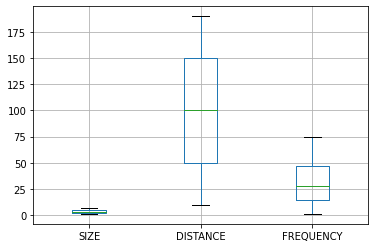

In [10]:
# Checking for outliers
flame.boxplot(column=['SIZE','DISTANCE','FREQUENCY'])

Since data is clean, we jump into normalization. Before we get into scaling, all categoricals should be converted into numericals. There are various ways for encoding categoricals. But here, I'm gonna use one hot encoder

There are so many scaling methods like log normalization, minmax scaler, robust scaler, standard scaler. Here, I'm gonna use standard scaler.

**One Hot Encoder**

In [11]:
df1 = pd.get_dummies(flame, columns=["FUEL"], prefix=["fuel"])
df1.columns= df1.columns.str.lower()
df1.head()

,size,distance,desibel,frequency,status,fuel_gasoline,fuel_kerosene,fuel_lpg,fuel_thinner
0,1,10,96,75,0,1,0,0,0
1,1,10,96,72,1,1,0,0,0
2,1,10,96,70,1,1,0,0,0
3,1,10,96,68,1,1,0,0,0
4,1,10,109,67,1,1,0,0,0


**Standard Scaler**

In [12]:
# Standard Scaler
from sklearn.preprocessing import StandardScaler
features = ['size','distance','desibel','frequency','fuel_gasoline','fuel_kerosene','fuel_lpg','fuel_thinner']
# Separating out the features
x = df1.loc[:,features]
# Separating out the target
y = df1.iloc[:,4:5]
# Standardizing the features
x = StandardScaler().fit_transform(x)

**Train-Test-Split**

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(13953, 8)
(13953, 1)
(3489, 8)
(3489, 1)


Now, we perform and compare different classifiers. The classifiers which I'm gonna try are:
1. Naive Bayes
2. Logistic Regression
3. Decision Tree
4. K Nearest Neighbors
6. Support Vector Classifier

**NAIVE BAYES**

In [14]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
cv = cross_val_score (gnb, x_train, y_train.values.ravel(), cv=5)
print (cv)
Acc_NB = cv.mean()
print ('Accuracy of Naive Bayes:',Acc_NB)

# Using CV -> Accuracy: 87%

[0.87674669 0.86993909 0.86671444 0.86308244 0.87598566]
Accuracy of Naive Bayes: 0.8704936630670268


In [15]:
# Using Training & Testing
# Training
gnb.fit(x_train, y_train.values.ravel())
#Testing
predicted = gnb.predict(x_test)
predicted

array([0, 0, 0, ..., 0, 0, 0])

In [16]:
y_test['status'].value_counts()

1    1754
0    1735
Name: status, dtype: int64

In [17]:
#Evaluation
#Confusion Matrix
from sklearn import metrics
conf_matrix = (metrics.confusion_matrix(y_test, predicted))
print(conf_matrix)

[[1517  218]
 [ 245 1509]]


In [18]:
tp = conf_matrix[0,0]
fp = conf_matrix[1,0]
fn = conf_matrix[0,1]
tn = conf_matrix[1,1]
print('TP:',tp)
print('FP:',fp)
print('FN:',fn)
print('TN:',tn)

TP: 1517
FP: 245
FN: 218
TN: 1509


From confusion matrix, 204 extinction flame states are wrongly predicted as non-extinction flame states and 225 non-extinction flame states are wrongly predicted as extinction flame states.

In [19]:
#Classification Report
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.86      0.87      0.87      1735
           1       0.87      0.86      0.87      1754

    accuracy                           0.87      3489
   macro avg       0.87      0.87      0.87      3489
weighted avg       0.87      0.87      0.87      3489



In [20]:
from sklearn.metrics import accuracy_score

S_NB = accuracy_score(y_test,predicted)
S_NB

0.8672972198337633

**Naive Bayes:-**

Accuracy using CV: 87%

Accuracy using train-test-split: 86.64%

**LOGISTIC REGRESSION**

I'm gonna implement this model in 2 ways:
1. Using 10-fold cross validation
2. Using 80% training data and 20%  test data

In [21]:
# Logistic Regression using 5-fold cross validation
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression (max_iter = 2000)
cv1 = cross_val_score (lr, x_train, y_train.values.ravel(), cv = 10)
print (cv1)
Acc_LR = cv1.mean()
print ('Accuracy of Logistic Regression:',Acc_LR)

[0.87965616 0.88681948 0.8760745  0.86666667 0.86164875 0.87168459
 0.88172043 0.86810036 0.87240143 0.87741935]
Accuracy of Logistic Regression: 0.8742191720327407


In [22]:
#Logistic Regression using train-test-split

#Training
lr.fit(x_train,y_train.values.ravel())
#Testing
predicted1 = lr.predict(x_test)
predicted1

array([0, 1, 0, ..., 0, 0, 0])

In [23]:
y_test['status'].value_counts()

1    1754
0    1735
Name: status, dtype: int64

In [24]:
#Evaluation
#Confusion Matrix
conf_matrix1=print(metrics.confusion_matrix(y_test, predicted1))
conf_matrix1

[[1503  232]
 [ 223 1531]]


In [25]:
#Classification Report
print(metrics.classification_report(y_test, predicted1))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87      1735
           1       0.87      0.87      0.87      1754

    accuracy                           0.87      3489
   macro avg       0.87      0.87      0.87      3489
weighted avg       0.87      0.87      0.87      3489



In [26]:
from sklearn.metrics import accuracy_score

S_LR = accuracy_score(y_test,predicted1)
S_LR

0.8695901404413873

**Logistic Regression:**

Accuracy using CV: 87.39%

Accuracy using train-test-splitL 86.7%

**DECISION TREE**

In [27]:
from sklearn import tree
dt = tree.DecisionTreeClassifier (max_depth = 5, random_state = 1)
cv2 = cross_val_score (dt, x_train, y_train, cv=10)
print (cv2)
Acc_DT = cv2.mean()
print ('Accuracy of Decision Tree:',Acc_DT)

[0.90472779 0.91404011 0.91762178 0.89749104 0.89605735 0.90179211
 0.91039427 0.8874552  0.9046595  0.91612903]
Accuracy of Decision Tree: 0.9050368179437408


In [28]:
# Create Decision Tree classifer object
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth = 5, random_state = 1)

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
predicted2 = clf.predict(x_test)

In [29]:
#Evaluation
#Confusion Matrix
conf_matrix2=print(metrics.confusion_matrix(y_test, predicted2))
conf_matrix2

[[1547  188]
 [ 138 1616]]


In [30]:
#Classification Report
print(metrics.classification_report(y_test, predicted2))

              precision    recall  f1-score   support

           0       0.92      0.89      0.90      1735
           1       0.90      0.92      0.91      1754

    accuracy                           0.91      3489
   macro avg       0.91      0.91      0.91      3489
weighted avg       0.91      0.91      0.91      3489



In [31]:
# Model Accuracy
S_DT = accuracy_score(y_test,predicted2)
S_DT

0.9065634852393236

In [32]:
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_1 <= 0.09
|   |--- feature_3 <= 1.48
|   |   |--- feature_3 <= -1.34
|   |   |   |--- feature_0 <= 0.05
|   |   |   |   |--- feature_3 <= -1.44
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_3 >  -1.44
|   |   |   |   |   |--- class: 1
|   |   |   |--- feature_0 >  0.05
|   |   |   |   |--- feature_0 <= 0.62
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_0 >  0.62
|   |   |   |   |   |--- class: 0
|   |   |--- feature_3 >  -1.34
|   |   |   |--- feature_1 <= -0.46
|   |   |   |   |--- feature_3 <= 0.90
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_3 >  0.90
|   |   |   |   |   |--- class: 1
|   |   |   |--- feature_1 >  -0.46
|   |   |   |   |--- feature_3 <= 0.66
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_3 >  0.66
|   |   |   |   |   |--- class: 0
|   |--- feature_3 >  1.48
|   |   |--- feature_1 <= -1.00
|   |   |   |--- feature_3 <= 1.88
|   |   |   |   |--- feature_0 <= 0.05
|   |   |   |   |   |--- 

In [33]:
df1.head()

,size,distance,desibel,frequency,status,fuel_gasoline,fuel_kerosene,fuel_lpg,fuel_thinner
0,1,10,96,75,0,1,0,0,0
1,1,10,96,72,1,1,0,0,0
2,1,10,96,70,1,1,0,0,0
3,1,10,96,68,1,1,0,0,0
4,1,10,109,67,1,1,0,0,0


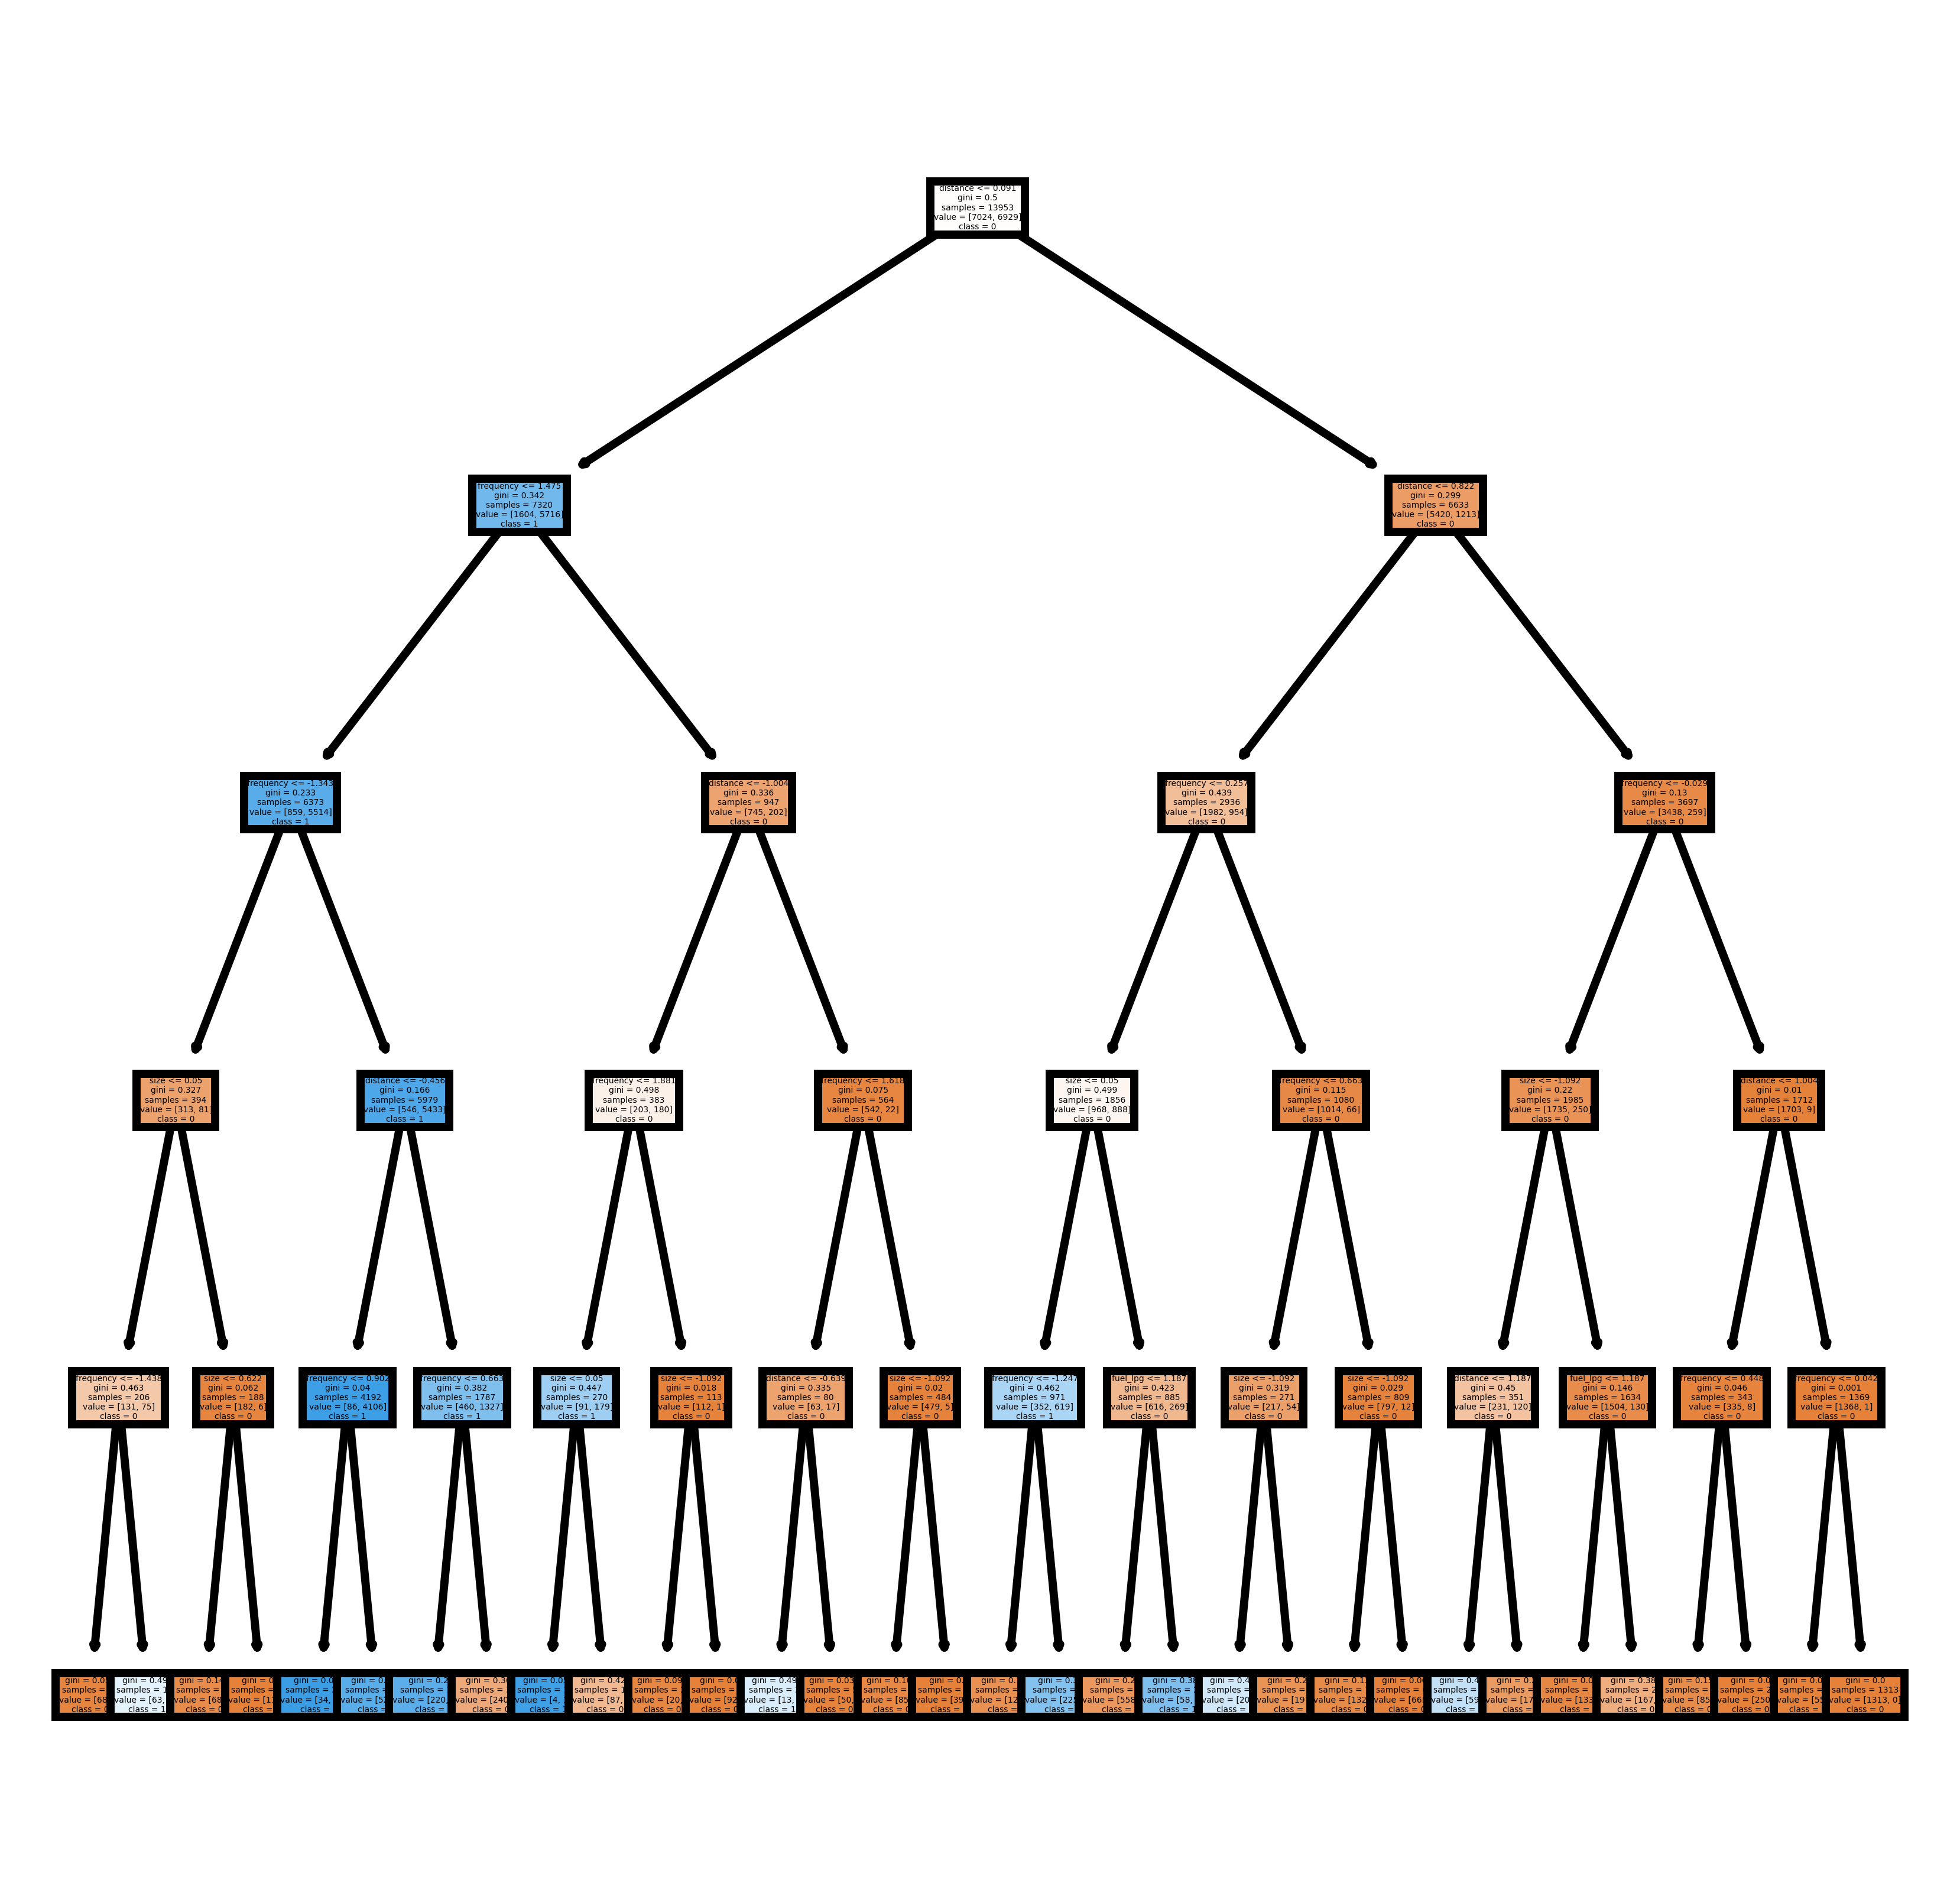

In [34]:
cn=['0','1']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=1000)
tree.plot_tree(clf,
               feature_names = features, 
               class_names=cn,
               filled = True);
fig.savefig('imagename.png')

**Decision Tree Classifier:-**

Accuracy using CV: 90.19%

Accuracy using train-test-split: 90.62%

**K-NEAREST NEIGHBOR**

In [35]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
cv3 = cross_val_score (knn, x_train, y_train.values.ravel(), cv=10)
print (cv3)
Acc_KNN = cv3.mean()
print ('Accuracy of KNN:',Acc_KNN)

[0.96633238 0.95415473 0.95487106 0.95125448 0.94336918 0.95913978
 0.94910394 0.95698925 0.96630824 0.96129032]
Accuracy of KNN: 0.9562813363321727


In [36]:
from sklearn import neighbors
knn_model = neighbors.KNeighborsClassifier(n_neighbors=3)
#Training
knn_model.fit(x_train,y_train.values.ravel())
#Testing
predicted3 = knn_model.predict(x_test)
predicted3

array([0, 1, 1, ..., 0, 0, 0])

In [37]:
#Evaluation
#Confusion Matrix
conf_matrix3=print(metrics.confusion_matrix(y_test, predicted3))
conf_matrix3

[[1669   66]
 [  72 1682]]


In [38]:
#Classification Report
print(metrics.classification_report(y_test, predicted3))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1735
           1       0.96      0.96      0.96      1754

    accuracy                           0.96      3489
   macro avg       0.96      0.96      0.96      3489
weighted avg       0.96      0.96      0.96      3489



In [39]:
S_KNN = accuracy_score(y_test,predicted3)
S_KNN

0.9604471195184867

**SUPPORT VECTOR CLASSIFIER**

In [40]:
from sklearn.svm import SVC
svc = SVC (C=1.0, kernel='rbf', degree=3, gamma='scale',probability = True)
cv4 = cross_val_score(svc, x_train, y_train.values.ravel(), cv=10)
print (cv4)
Acc_SVC = cv4.mean()
print ('Accuracy of SVC:',Acc_SVC)

[0.94412607 0.94126074 0.9512894  0.93405018 0.93835125 0.94551971
 0.93763441 0.93620072 0.94193548 0.95483871]
Accuracy of SVC: 0.9425206683714864


In [41]:
#Training
svc.fit(x_train, y_train.values.ravel())
#Testing
predicted4 = knn_model.predict(x_test)
predicted4

array([0, 1, 1, ..., 0, 0, 0])

In [42]:
#Evaluation
#Confusion Matrix
conf_matrix4=print(metrics.confusion_matrix(y_test, predicted4))
conf_matrix4

[[1669   66]
 [  72 1682]]


In [43]:
#Classification Report
print(metrics.classification_report(y_test, predicted4))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1735
           1       0.96      0.96      0.96      1754

    accuracy                           0.96      3489
   macro avg       0.96      0.96      0.96      3489
weighted avg       0.96      0.96      0.96      3489



In [44]:
S_SVC = accuracy_score(y_test,predicted4)
S_SVC

0.9604471195184867

**ENSEMBLE TECHNIQUES**

Here, I'm using two ensemble techniques:
1. Random Forest Classifier
2. Soft Voting Classifier

**RANDOM FOREST CLASSIFIER**

In [45]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier (random_state = 1)
cv5 = cross_val_score (rf, x_train, y_train.values.ravel(), cv=10)
print (cv5)
Acc_RF = cv5.mean()
print ('Accuracy of Random Forest Classifier:',Acc_RF)

[0.98065903 0.97206304 0.97922636 0.97060932 0.97060932 0.97491039
 0.98064516 0.97562724 0.97706093 0.97706093]
Accuracy of Random Forest Classifier: 0.9758471721559807


In [46]:
#Training
rf.fit(x_train, y_train.values.ravel())
#Testing
predicted5 = rf.predict(x_test)
predicted5

array([0, 1, 1, ..., 0, 0, 0])

In [47]:
#Evaluation
#Confusion Matrix
conf_matrix5=print(metrics.confusion_matrix(y_test, predicted5))
conf_matrix5

[[1703   32]
 [  38 1716]]


In [48]:
#Classification Report
print(metrics.classification_report(y_test, predicted5))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1735
           1       0.98      0.98      0.98      1754

    accuracy                           0.98      3489
   macro avg       0.98      0.98      0.98      3489
weighted avg       0.98      0.98      0.98      3489



In [49]:
#Model Accuracy
S_RF = accuracy_score(y_test,predicted5)
S_RF

0.9799369446832903

**SOFT VOTING CLASSIFIER**

In [50]:
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier (estimators = [('lr',lr), ('knn',knn), ('rf',rf), ('gnb',gnb), ('svc',svc)], voting = 'soft')
cv6 = cross_val_score (voting_clf, x_train, y_train.values.ravel(), cv=10)
print (cv6)
Acc_Soft = cv6.mean()
print ('Accuracy of Soft Voting Classifier:',Acc_Soft)

[0.95487106 0.95558739 0.95773639 0.95412186 0.94910394 0.96344086
 0.95340502 0.95483871 0.96415771 0.96487455]
Accuracy of Soft Voting Classifier: 0.9572137494736624


In [51]:
voting_clf.fit (x_train, y_train.values.ravel())
predicted6 = voting_clf.predict (x_test)
predicted6

array([0, 1, 0, ..., 0, 0, 0])

In [52]:
#Evaluation
#Confusion Matrix
conf_matrix5=print(metrics.confusion_matrix(y_test, predicted6))
conf_matrix5

[[1661   74]
 [  81 1673]]


In [53]:
S_Soft = accuracy_score(y_test,predicted6)
S_Soft

0.9555746632272858

In [54]:
c = {'Classifier':['Naive Bayes','Logistic Regression','Decision Tree','K Nearest Neighbors','Support Vector Classifier','Random Forest Classifier','Soft Voting Classifier'],'Accuracy_CV':[Acc_NB,Acc_LR,Acc_DT,Acc_KNN,Acc_SVC, Acc_RF,Acc_Soft], 'Accuracy_Split': [S_NB,S_LR,S_DT,S_KNN,S_SVC,S_RF,S_Soft]}
Best_c = pd.DataFrame(c)
Best_c

,Classifier,Accuracy_CV,Accuracy_Split
0,Naive Bayes,0.870494,0.867297
1,Logistic Regression,0.874219,0.869590
2,Decision Tree,0.905037,0.906563
3,K Nearest Neighbors,0.956281,0.960447
4,Support Vector Classifier,0.942521,0.960447
5,Random Forest Classifier,0.975847,0.979937
6,Soft Voting Classifier,0.957214,0.955575


Random Forest Classifier seems to be the best classifier for classifying extinction and non extinction states between four types of fuel flames. We can use other types of classifiers as well as they are also given good accuracy score and high precision and recall values. More importantly, there's no class imbalance problem in the dataset.